# Agrupamentos K-means
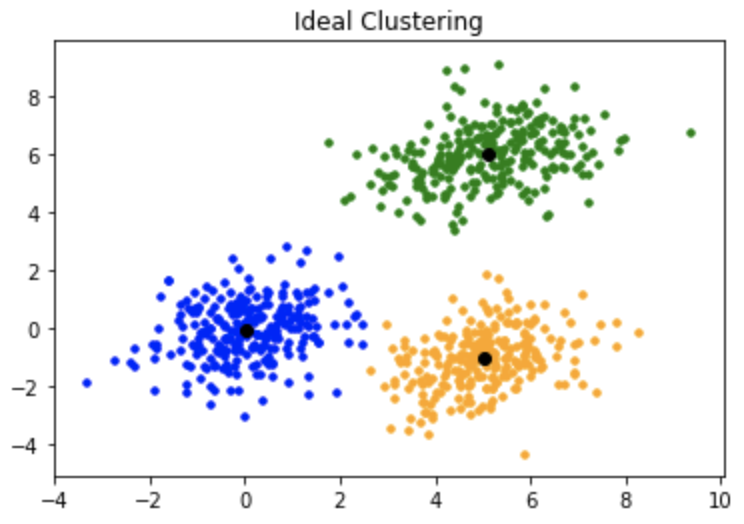
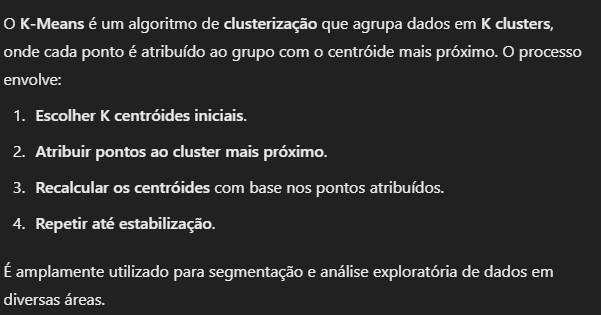

## Trabalhando

In [6]:
import pandas as pd
dados = pd.read_csv('housing.csv')

In [8]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

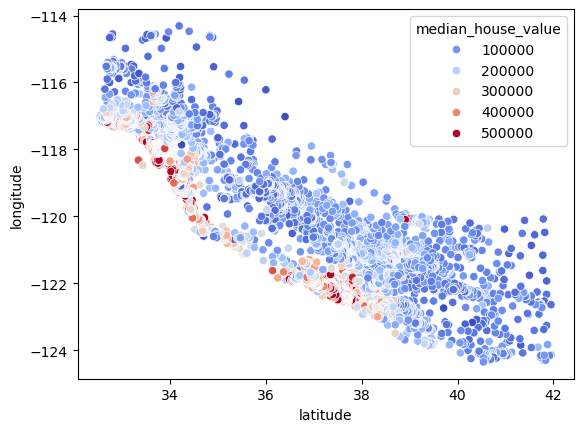

In [12]:
import seaborn as sb
sb.scatterplot(x='latitude', y='longitude', data=dados, hue='median_house_value', palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

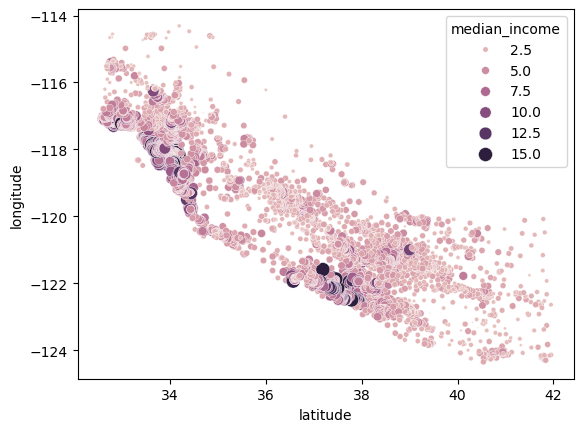

In [30]:
sb.scatterplot(
    x='latitude',
    y='longitude',
    data=dados,
    hue='median_income', 
    size=dados['median_income'],
    sizes=(1,100)
)

In [32]:
dados.loc[:, ['latitude', 'longitude', 'median_income']]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [54]:
# linha necessária para aumentar a quantidades de núcleos de procesamento para o KMeans
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4' 

from sklearn.cluster import KMeans

X = dados.loc[:, ['latitude', 'longitude', 'median_income']]
modelo = KMeans(n_clusters=6)
predicao = modelo.fit_predict(X)

In [56]:
predicao

array([5, 5, 5, ..., 4, 4, 4])

In [58]:
predicao.shape

(20640,)

In [60]:
X['segmento_economico'] = predicao

In [62]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,4
20636,39.49,-121.21,2.5568,4
20637,39.43,-121.22,1.7000,4
20638,39.43,-121.32,1.8672,4


In [64]:
X['segmento_economico'].value_counts()

segmento_economico
1    6597
2    4625
4    4522
0    3478
3     747
5     671
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

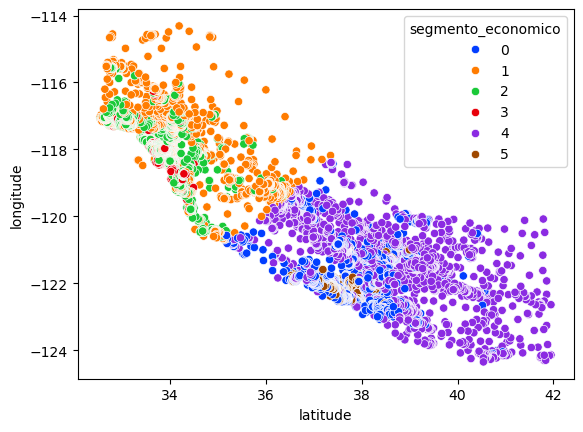

In [69]:
sb.scatterplot(
    x='latitude',
    y='longitude',
    data=X,
    hue='segmento_economico',
    palette='bright'
)

<Axes: xlabel='segmento_economico', ylabel='count'>

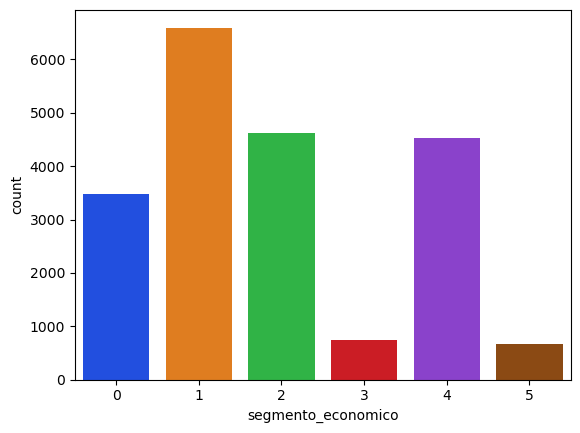

In [83]:
sb.countplot(x='segmento_economico', data=X, palette='bright', hue='segmento_economico', legend=False)

In [87]:
X.groupby(['segmento_economico'])['median_income'].mean()

segmento_economico
0    4.630096
1    2.635406
2    4.929962
3    8.976338
4    2.509744
5    8.265194
Name: median_income, dtype: float64

In [89]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,5
1,37.86,-122.22,8.3014,5
2,37.85,-122.24,7.2574,5
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,4
20636,39.49,-121.21,2.5568,4
20637,39.43,-121.22,1.7000,4
20638,39.43,-121.32,1.8672,4
